In [2]:
#Changing directory
import os
os.chdir("C:\\Study Material\\UTD studymaterial\\Applied Machine Learning")

In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import math

In [399]:
#Cost function
def cost_func(x,y,beta):
    y_cap = np.array(np.dot(x,beta),dtype = np.float64)
    err = y_cap - y
    tse = np.sum(np.square(err, dtype=np.float64))
    cost = (1/x.shape[0])*0.5*tse
    return cost

In [400]:
#Gradient Descent Function
def grad_func(beta,lr,x,y,max_iter,diff_cost):
    y = y[:,np.newaxis]
    y_rows, y_cols = y.shape
    
    x_rows, x_col = x.shape
    x_not = np.ones((x_rows,1))
    X = np.hstack((x_not,x))
    X_rows, X_col = X.shape
    
    curr_diff_cost = diff_cost + 1
    new_beta = np.random.rand(X_col,1)
    cost_matrix = np.zeros(max_iter)
    beta_matrix = np.zeros((max_iter,X_col))
    itr = 0
    
    while itr <max_iter and curr_diff_cost > diff_cost:
        y_cap = np.array(np.dot(X,new_beta),dtype = np.float64)
        err = y_cap - y
        grad = lr*(X.T.dot(err))*(1/X_rows)
        new_beta -= grad
        cost = cost_func(X,y,new_beta)
        beta_matrix[itr,:] = new_beta.T
        cost_matrix[itr] = cost
        
        if itr == 0:
            pass
        else:
            curr_diff_cost = cost_matrix[itr-1] - cost_matrix[itr]
            
        itr +=1 
        
    beta_final = beta_matrix[np.argmin(cost_matrix[cost_matrix>0])]
    
    return beta_matrix, cost_matrix[cost_matrix >0], beta_final

In [401]:
#Function to calculate error after prediction using Linear Regression
def pred_linear(x,y,beta):
    x_rows, x_col = x.shape
    x_not = np.ones((x_rows,1))
    X = np.hstack((x_not,x))
    y = y[:,np.newaxis]
    y_cap = np.array(np.dot(X,beta.T),dtype = np.float64)
    err = y_cap - y
    tse = np.sum(np.square(err))
    ess = tse / (2*X_rows)
    
    return ess

In [7]:
#Read data from the .csv file
data = pd.read_csv("C:\\Study Material\\UTD studymaterial\\Applied Machine Learning\\energydata_daynight.csv")

In [8]:
#Converting into a DataFrame and using day_night parameter
df = pd.DataFrame(data)
del df['date']
Day_Night_dummies = pd.get_dummies(df['Day_Night'],prefix='Day_Night')
df = pd.concat([df, Day_Night_dummies], axis=1)
del df['Day_Night']
df.rename({'Day_Night_0.0': 'Night', 'Day_Night_1.0': 'Day'}, axis=1, inplace=True)
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Night,Day
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,6.60,733.500000,92.000000,7.000000,63.000000,5.30,13.275433,13.275433,1,0
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.48,733.600000,92.000000,6.666667,59.166667,5.20,18.606195,18.606195,1,0
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.37,733.700000,92.000000,6.333333,55.333333,5.10,28.642668,28.642668,1,0
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.25,733.800000,92.000000,6.000000,51.500000,5.00,45.410390,45.410390,1,0
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,6.13,733.900000,92.000000,5.666667,47.666667,4.90,10.084097,10.084097,1,0
5,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,...,6.02,734.000000,92.000000,5.333333,43.833333,4.80,44.919484,44.919484,1,0
6,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,...,5.90,734.100000,92.000000,5.000000,40.000000,4.70,47.233763,47.233763,1,0
7,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,...,5.92,734.166667,91.833333,5.166667,40.000000,4.68,33.039890,33.039890,1,0
8,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,...,5.93,734.233333,91.666667,5.333333,40.000000,4.67,31.455702,31.455702,1,0
9,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,...,5.95,734.300000,91.500000,5.500000,40.000000,4.65,3.089314,3.089314,1,0


In [404]:
#data = (data - data.mean())/data.std()
#data.head()

In [470]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state = 0)

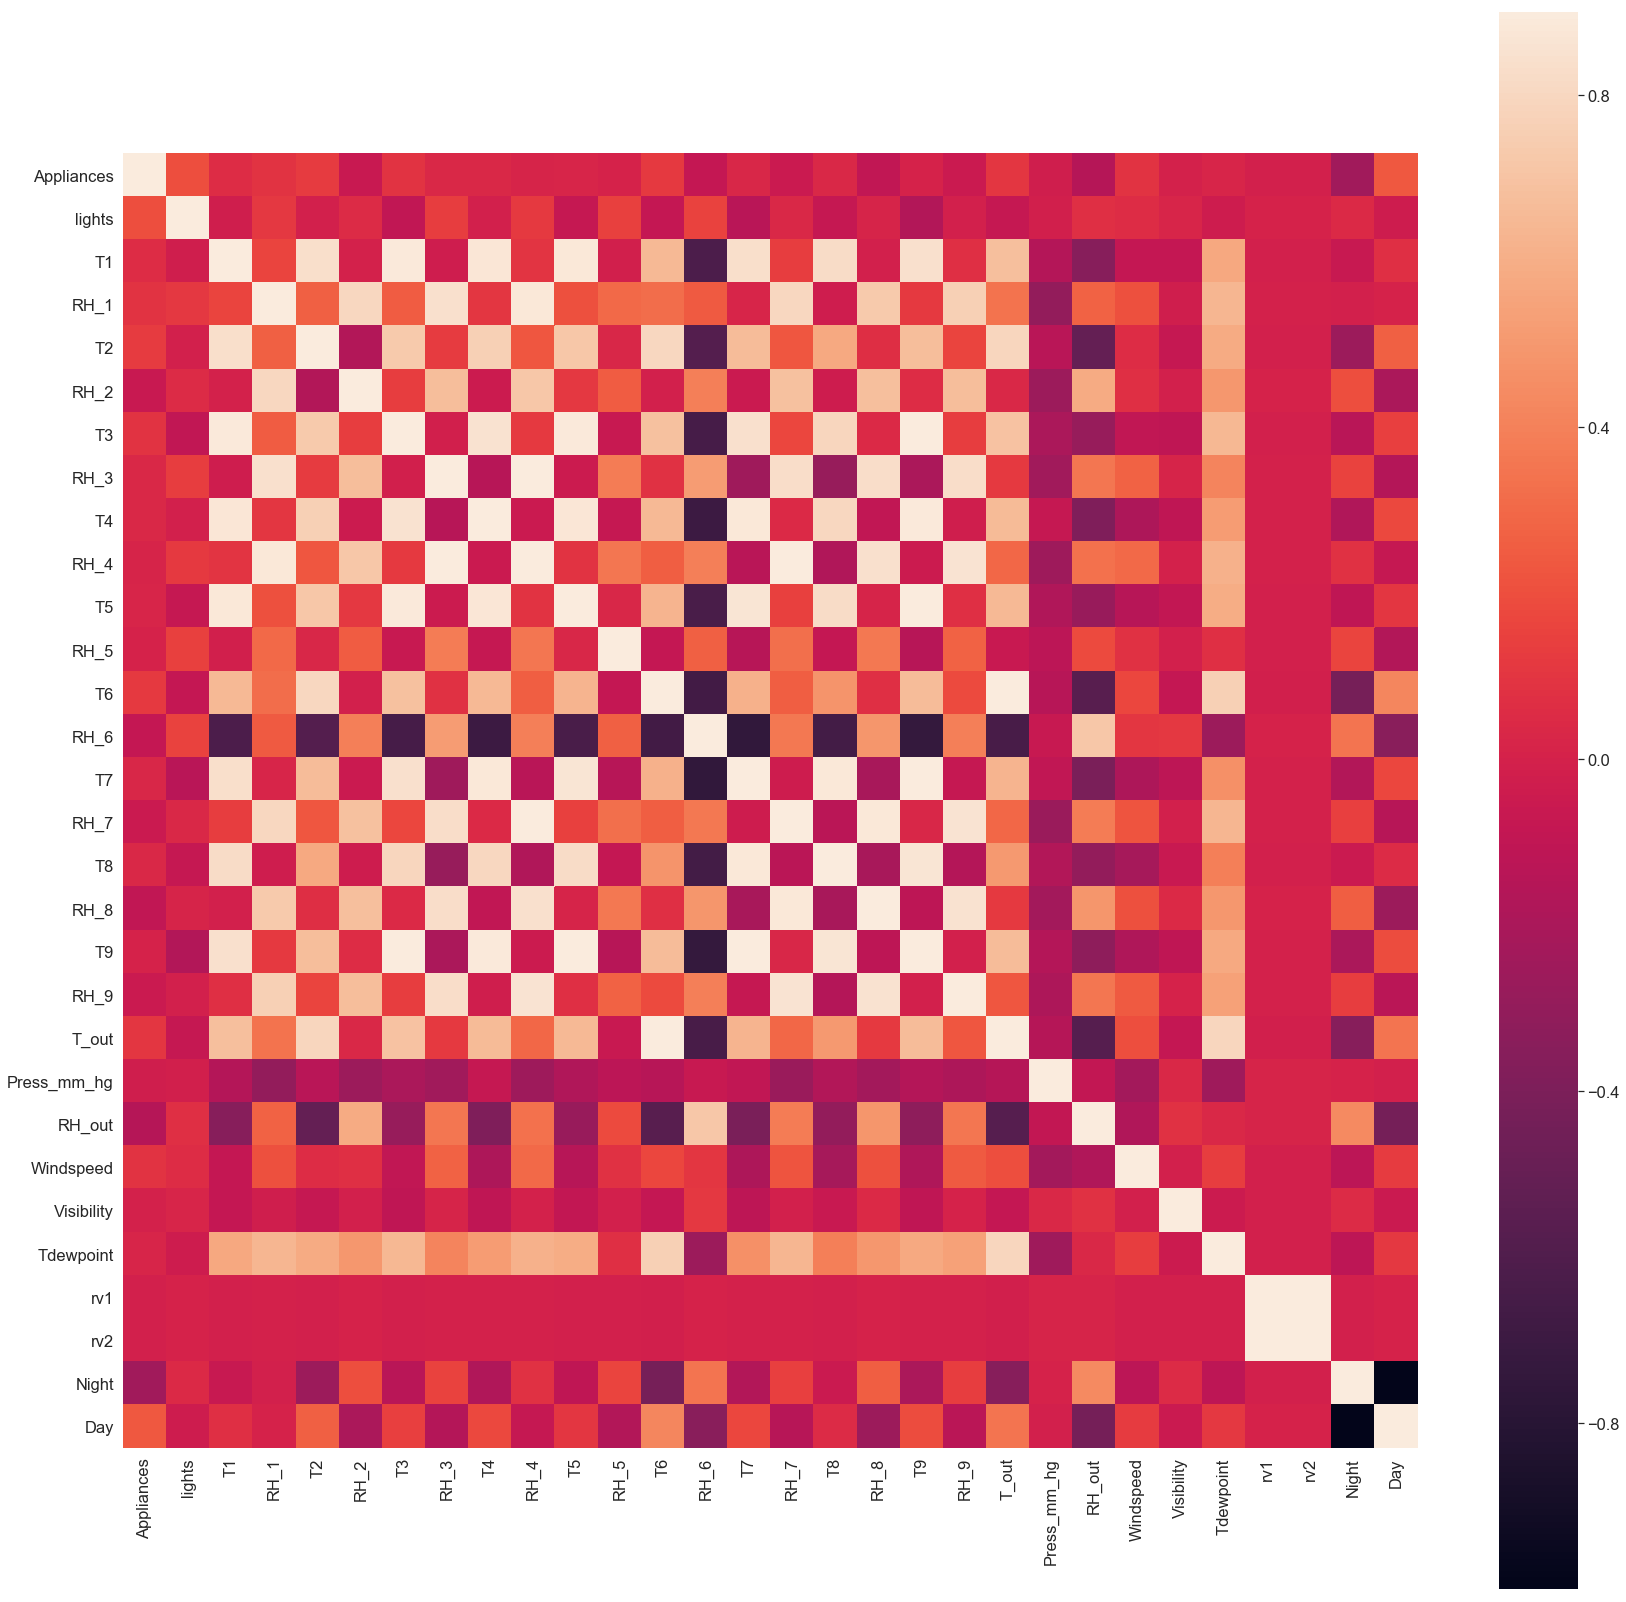

In [406]:
#Heatmap to show the correlation between the variables
corrmat = train.corr()
plt.subplots(figsize=(29,29))
sns.heatmap(corrmat, vmax=0.9, square=True)

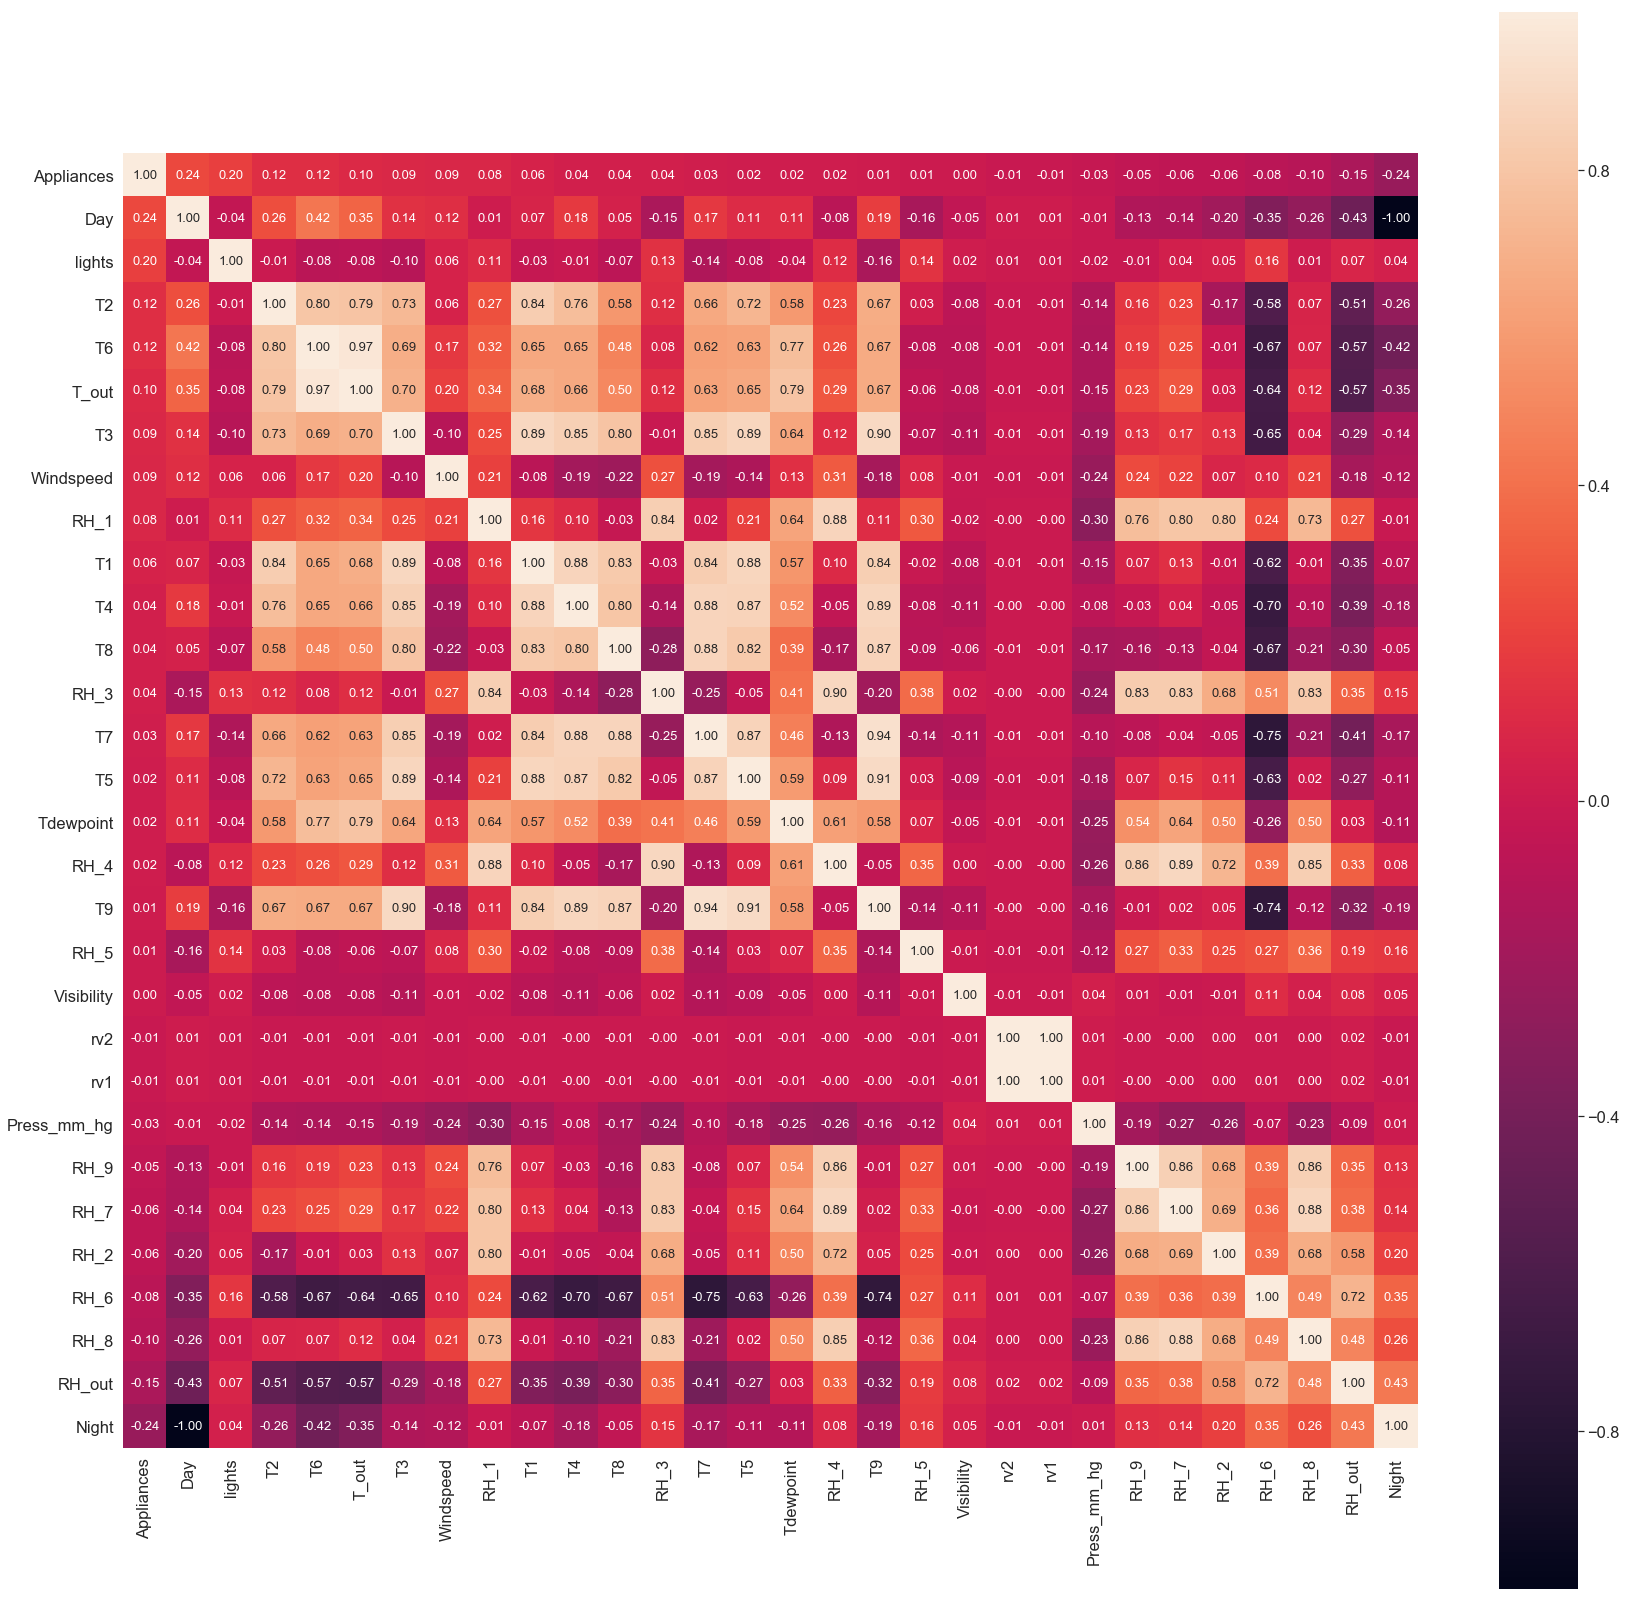

In [407]:
#Heatmap to show the correlation score
k = 30 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Appliances')['Appliances'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.50)
plt.subplots(figsize=(29,29))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [471]:
#Dividing train and test dataset into x(independent variables) and y(dependent variable)
x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
x_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.01965688 0.0354823  0.03743255 0.0379226  0.03898313 0.03446479
 0.03729221 0.03424509 0.03773385 0.03313827 0.03881456 0.04028897
 0.03704099 0.03217484 0.03850342 0.04079004 0.04359126 0.02931277
 0.04094122 0.03929046 0.03753204 0.04002239 0.0322735  0.0300896
 0.03940254 0.04015422 0.0403895  0.00779568 0.00524032]


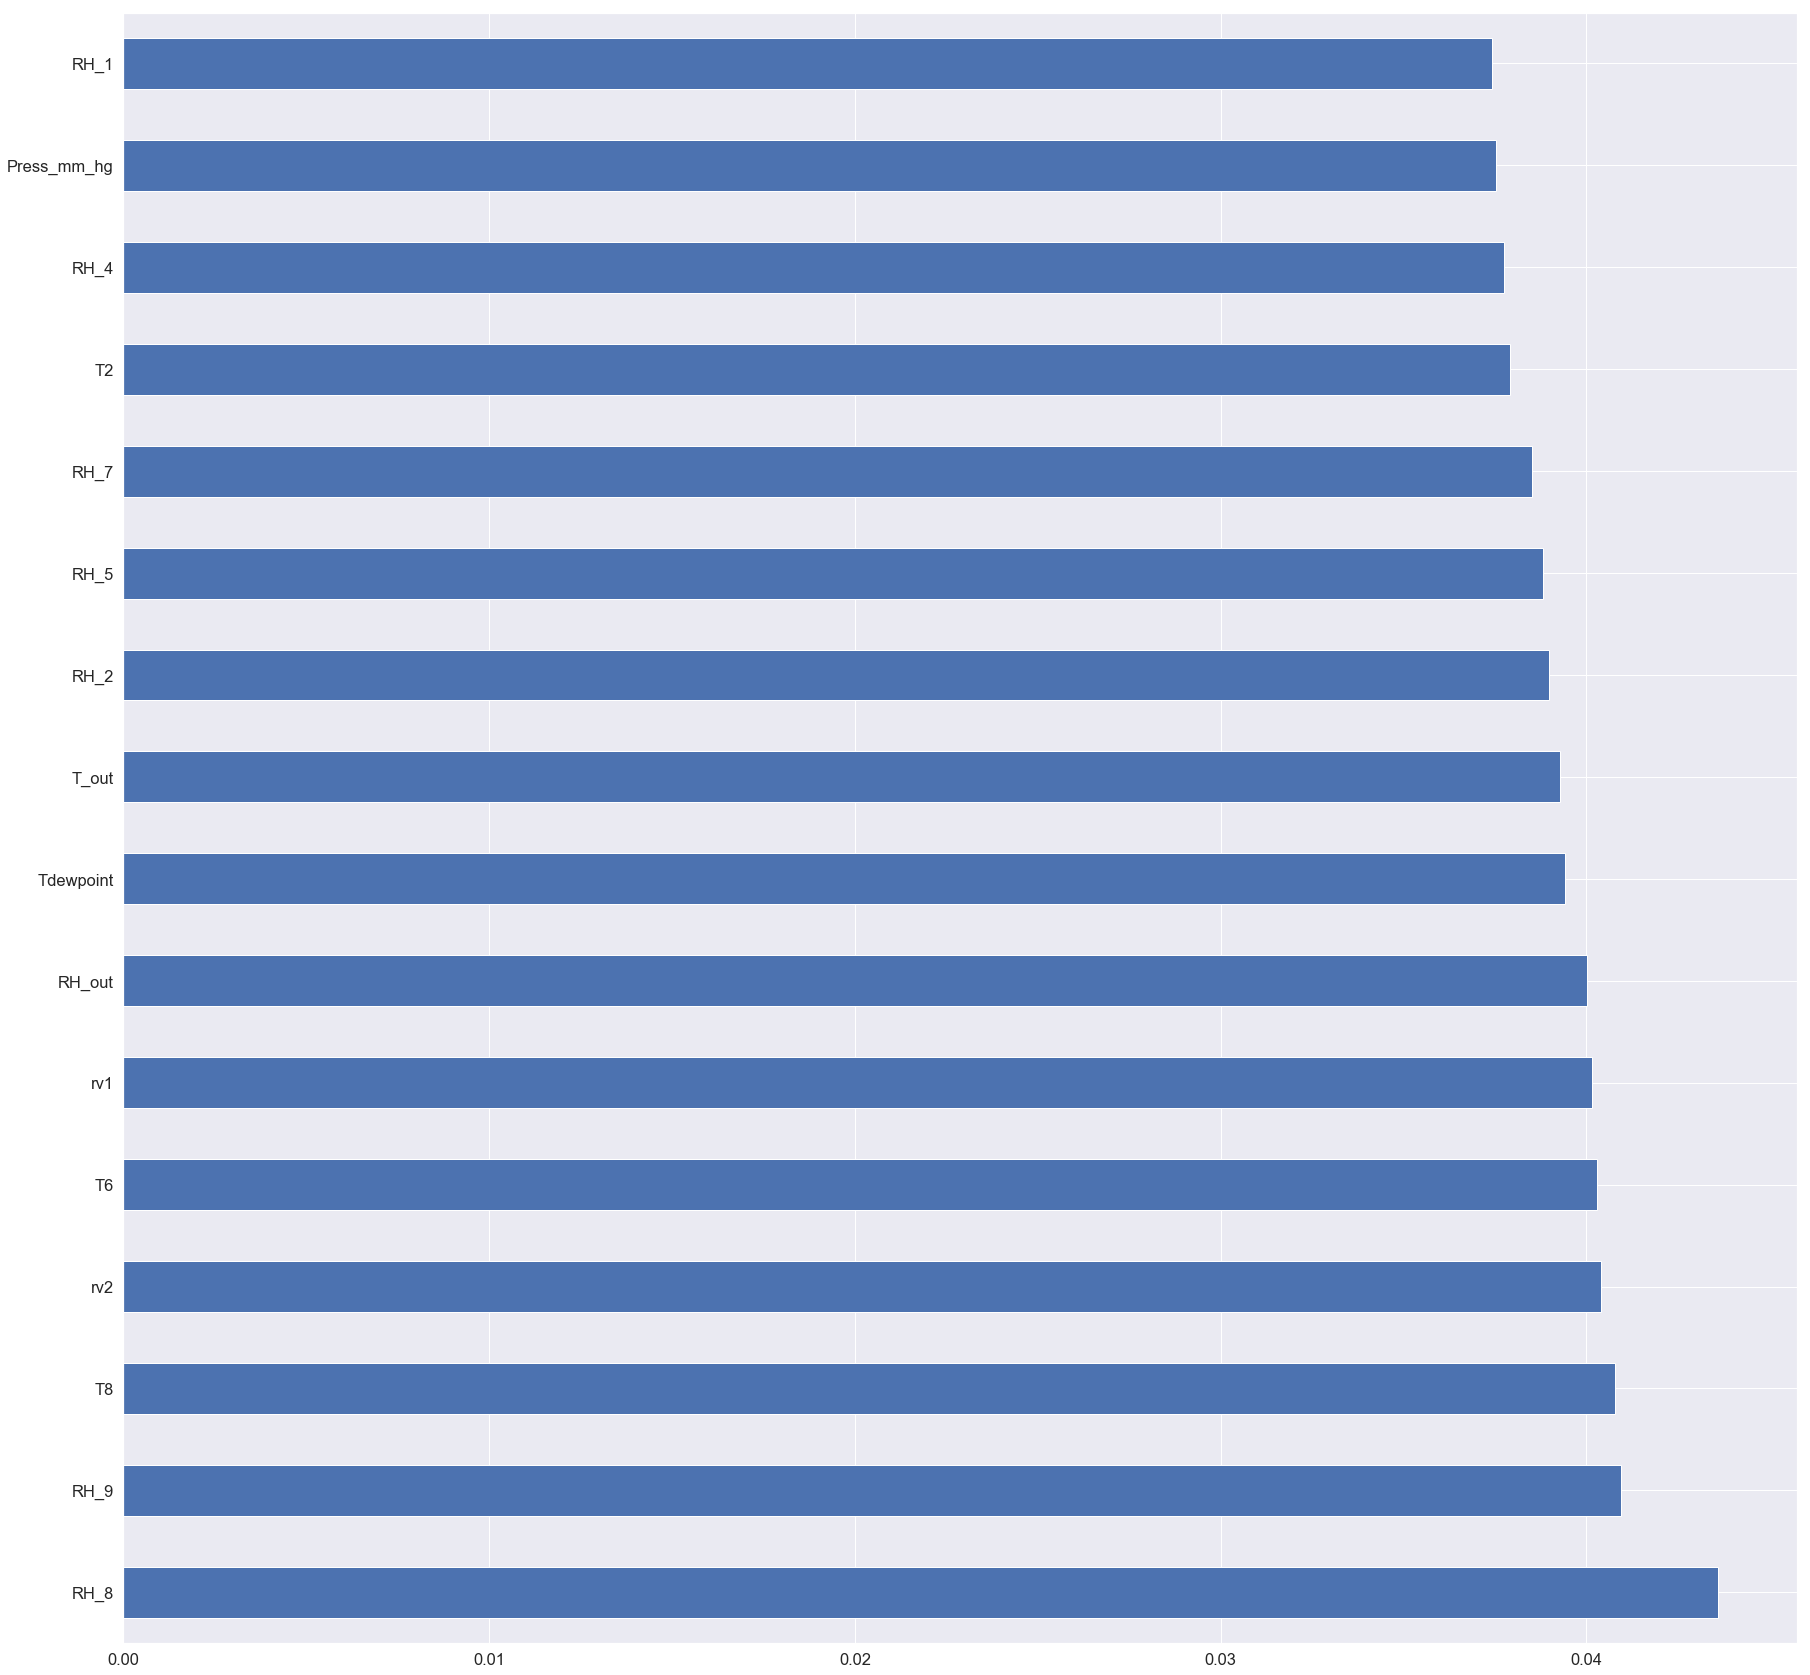

In [409]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(16).plot(kind='barh',figsize=(30,30))
plt.show()

In [410]:
#Dataset for the initial dataset where features were selected based on ExtraTreesClassifier
x_train_task = x_train.loc[:,['lights','RH_7','Press_mm_hg','T2','T6','RH_1','RH_out','T3','RH_6','T1','T8','RH_3','T4','T7','T_out','RH_5','Tdewpoint']]
x_test_task = x_test.loc[:,['lights','RH_7','Press_mm_hg','T2','T6','RH_1','RH_out','T3','RH_6','T1','T8','RH_3','T4','T7','T_out','RH_5','Tdewpoint']]

from sklearn.preprocessing import StandardScaler
modify_x = StandardScaler()
x_train_task_scaled = modify_x.fit_transform(x_train_task)
x_test_task_scaled = modify_x.transform(x_test_task)

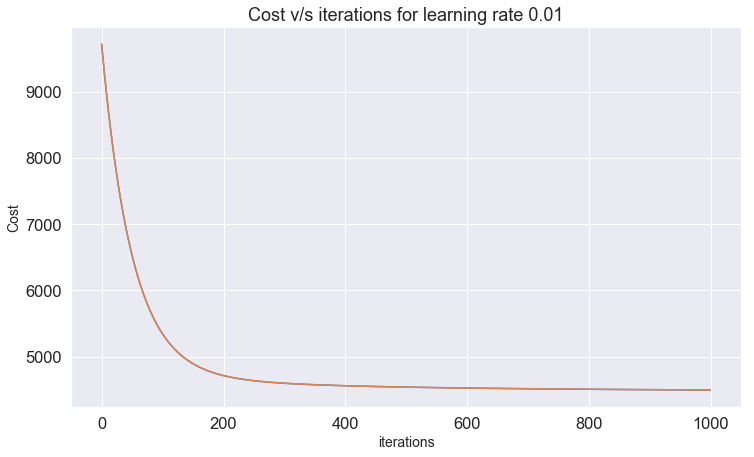

Best beta paramenters for learning rate 0.01, improvement rate 0.001 and random seed 12500 [ 97.27982441  20.63226071 -23.74914041  -0.42418307   9.49270666
  10.47355365  21.39685886 -10.65134548  23.21700415  -0.51097707
  -6.42715239   1.84195547   5.53334181 -17.01026269  -6.76139186
  -3.63901809  -0.75072696  -8.5819314 ]
training error [4496.771915885808]
testing error [1533652.9392977806]


In [411]:
#For implementing task's part 2 & 3
#Running Linear Regression with gradient descent on the dataset    
max_iter = 1000
lr = 0.01
diff_cost = 0.001
np.random.seed(12500)
train_err = []
test_err = []
beta = np.random.rand(x_train_scaled.shape[1],1)
beta_df = pd.DataFrame(beta,columns = ['Beta_values'])
betas,costs, beta_final = grad_func(beta_df, lr,x_train_task_scaled,y_train,max_iter,diff_cost)
train_err.append(np.min(costs))
test_err.append(pred_linear(x_test_task_scaled,y_test,betas))
plt.figure(figsize =(12,7))
plt.plot(costs)
plt.title('Cost v/s iterations for learning rate 0.01', fontsize = 18)
plt.ylabel('Cost', fontsize = 14)
plt.xlabel('iterations', fontsize = 14)
plt.plot(costs)
plt.show()
print("Best beta paramenters for learning rate 0.01, improvement rate 0.001 and random seed 12500", beta_final)
print("training error", train_err)
print("testing error", test_err)

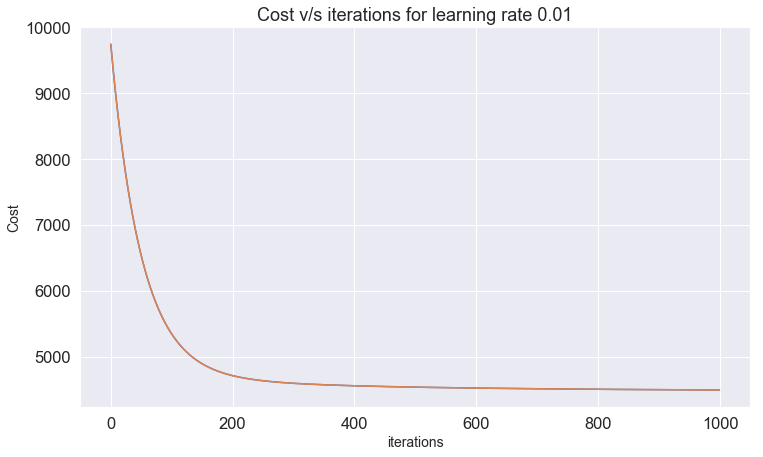

Best beta paramenters for all zero beta value, learning rate 0.01, improvement rate 0.001 and random seed 12500 [ 97.27981662  20.62571801 -23.72418661  -0.43766481   9.33428924
  10.4599876   21.30961428 -10.67984952  23.49517004  -0.47839621
  -6.48290857   1.76472333   5.56840253 -16.78795866  -6.9838484
  -3.54489419  -0.73453984  -8.65469474]
training error [4496.713394996688]
testing error [1533978.810755338]


In [425]:
#For implementing task's part 2 & 3
#Running Linear Regression with gradient descent on the dataset    
max_iter = 1000
lr = 0.01
diff_cost = 0.001
np.random.seed(12500)
train_err = []
test_err = []
x_train_scaled_rows,x_train_scaled_col =x_train_scaled.shape
beta = np.zeros((x_train_scaled_col,1))
beta_df = pd.DataFrame(beta,columns = ['Beta_values'])
betas,costs, beta_final = grad_func(beta_df, lr,x_train_task_scaled,y_train,max_iter,diff_cost)
train_err.append(np.min(costs))
test_err.append(pred_linear(x_test_task_scaled,y_test,betas))
plt.figure(figsize =(12,7))
plt.plot(costs)
plt.title('Cost v/s iterations for learning rate 0.01', fontsize = 18)
plt.ylabel('Cost', fontsize = 14)
plt.xlabel('iterations', fontsize = 14)
plt.plot(costs)
plt.show()
print("Best beta paramenters for all zero beta value, learning rate 0.01, improvement rate 0.001 and random seed 12500", beta_final)
print("training error", train_err)
print("testing error", test_err)

In [472]:
#Implementation of Logistic Regression
x_logi = df.loc[:,['Day','lights','T2','T6','RH_1','T3','Windspeed','T1','T8','RH_3','T4','T7','T5','Tdewpoint','RH_5','Visibility'] ]
y_logi = df.iloc[:, 0]
y_logi_cat = []
y_logi_mean = y_logi.mean()#calculating the mean of the appliances column
y_logi_cat = y_logi.apply(lambda x: 'High' if (x> y_logi_mean) else 'Low')
#convert_cat_func = lambda x : High if (x> y_logi_mean) else Low
#y_logi_cat=pd.DataFrame(y_logi_cat)


#Splitting into train and test data
from sklearn.model_selection import train_test_split
x_logi_train, x_logi_test, y_logi_train, y_logi_test = train_test_split(x_logi,y_logi_cat,test_size = 0.2, random_state = 0)



# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_logi_train, y_logi_cat_train)

# Predicting the Test set results
y_pred_train = classifier.predict(x_logi_train)
y_pred_test = classifier.predict(x_logi_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_logi_train, y_pred_train)
cm_test = confusion_matrix(y_logi_test, y_pred_test)

#Sensitivity refers to the test's ability to correctly detect high usage of electricity by appliances
#Sensitivity refers to the test's ability to correctly detect low usage of electricity by appliances
sensitivity_train = cm_train[1,1]/(cm_train[0,1]+cm_train[1,1])
specificity_train = cm_train[0,0]/(cm_train[0,0]+cm_train[1,0])
sensitivity_test = cm_test[1,1]/(cm_test[0,1]+cm_test[1,1])
specificity_test = cm_test[0,0]/(cm_test[0,0]+cm_test[1,0])

print('Confusion Matrix for training set', cm_train)
print('Sensitivity for training set',sensitivity_train)
print('Specificity for training set',specificity_train)

print('Confusion Matrix for testing set', cm_test)
print('Sensitivity for testing set',sensitivity_test)
print('Specificity for testing set',specificity_test)




C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix for training set [[ 1585  2585]
 [  877 10741]]
Sensitivity for training set 0.8060183100705388
Specificity for training set 0.6437855402112104
Confusion Matrix for testing set [[ 389  652]
 [ 249 2657]]
Sensitivity for testing set 0.8029616198247205
Specificity for testing set 0.609717868338558


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    6.6s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.6s finished


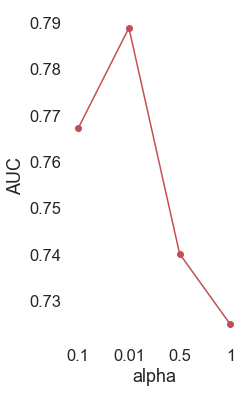

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 0.7888525049700081


In [477]:
#Implementing Logistic Regression with different alpha
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf
grid = {
    'alpha': [0.1,0.01,0.5,1], # learning rate
        'loss': ['log'] # logistic regression,
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
           x_logi_train, y_logi_train, x_logi_test, y_logi_test, 
           metric = roc_auc_score, scoreLabel = "AUC")

print(bestModel, bestScore)

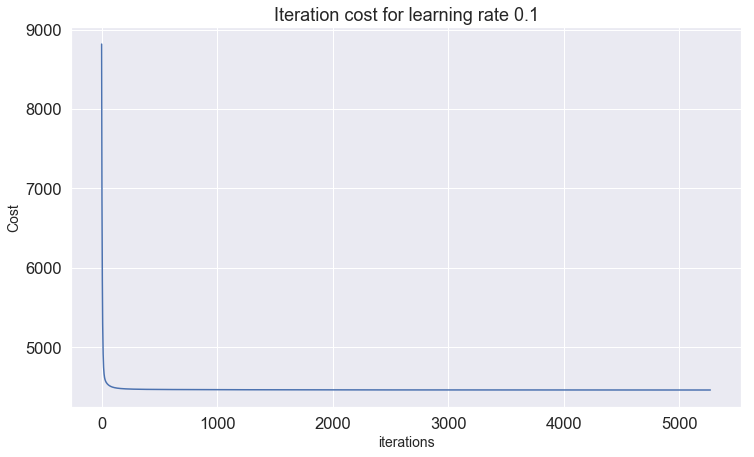

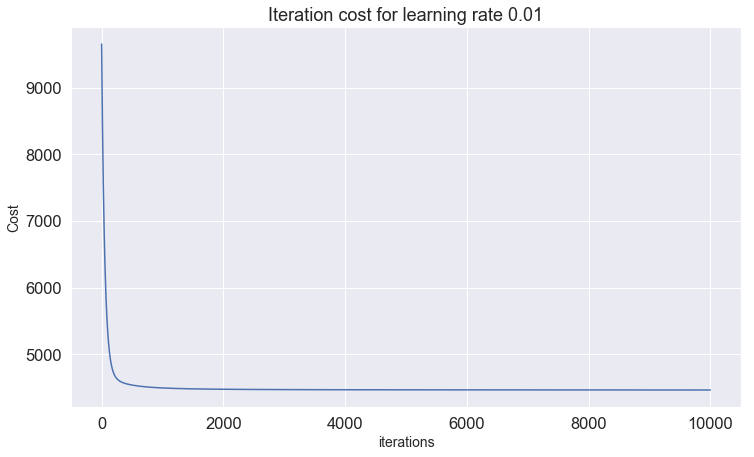

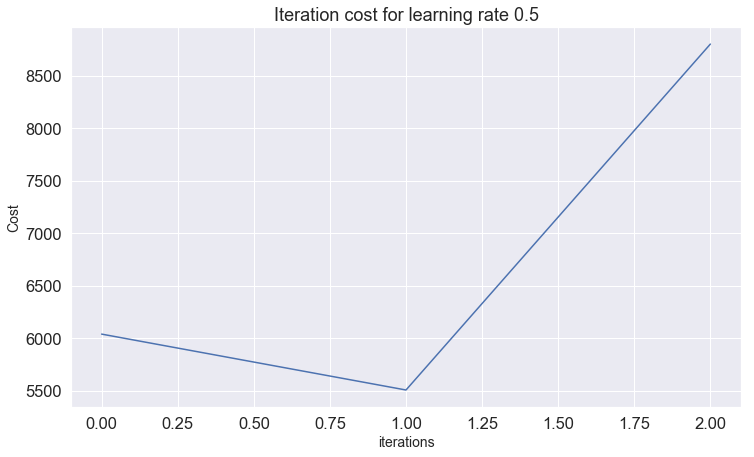

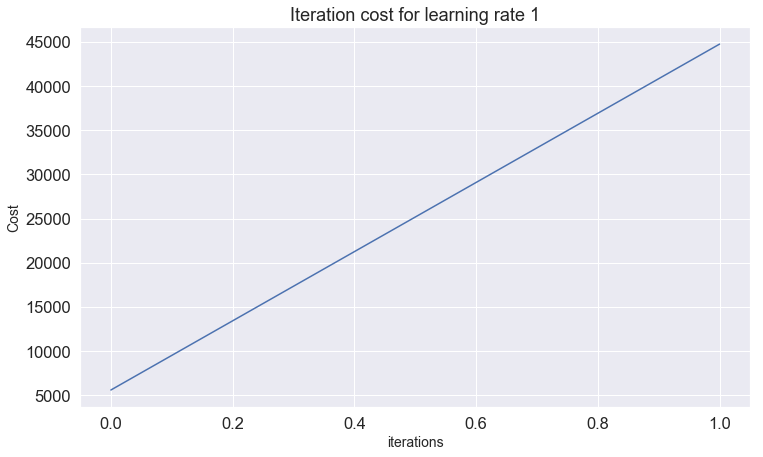

training error [4462.133705267987, 4466.226333855918, 5508.921381928174, 5593.946151180119]
testing error [21916742.371476986, 14422128.535064865, 30370141.151880234, 30381633.90784737]


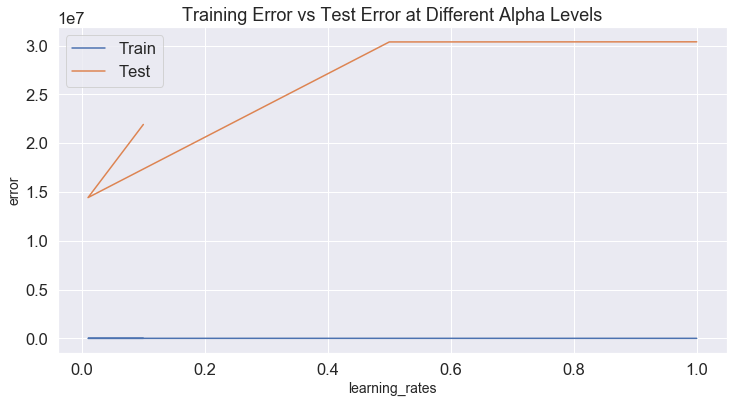

In [412]:
#1. Experiment with various parameters for linear and logistic regression (e.g. learning rate ∝) 
#and report on your findings as how the error/accuracy varies for train and test sets with varying 
#these parameters. Plot the results. Report the best values of the parameters. 

max_iter = 10000
diff_cost = 0.0001
np.random.seed(12500)
train_err = []
test_err = []
learning_rates = (0.1,0.01,0.5,1)
for lr in learning_rates:
    beta = np.random.rand(x_train_task_scaled.shape[1],1)
    beta_df = pd.DataFrame(beta,columns = ['Beta_values'])
    betas,costs, beta_final = grad_func(beta_df, lr,x_train_task_scaled,y_train,max_iter,diff_cost)
    train_err.append(costs[np.argmin(costs)])
    test_err.append(pred_linear(x_test_task_scaled,y_test,betas))
    plt.figure(figsize =(12,7))
    plt.plot(costs)
    plt.title('Iteration cost for learning rate %s' % lr)
    plt.ylabel('Cost', fontsize = 14)
    plt.xlabel('iterations', fontsize = 14)
    plt.show()
    
    
print("training error", train_err)
print("testing error", test_err)


plt.figure(figsize = (12,6))
plt.title("Training Error vs Test Error at Different Alpha Levels")
plt.plot(learning_rates,train_err, label='Train')   
plt.plot(learning_rates,test_err, label='Test')
plt.ylabel('error', fontsize=14)
plt.xlabel('learning_rates', fontsize=14)
#plt.xlim(left = .000005,right=.000030)
#plt.ylim(0,1000)
plt.legend()
plt.show()



# 2. Experiment with various thresholds for convergence for linear regression. Plot error results for train and test sets as a function of threshold and describe how varying the threshold  affects error. Pick your best threshold and plot train and test error (in one figure) as a function of number of gradient descent iterations.

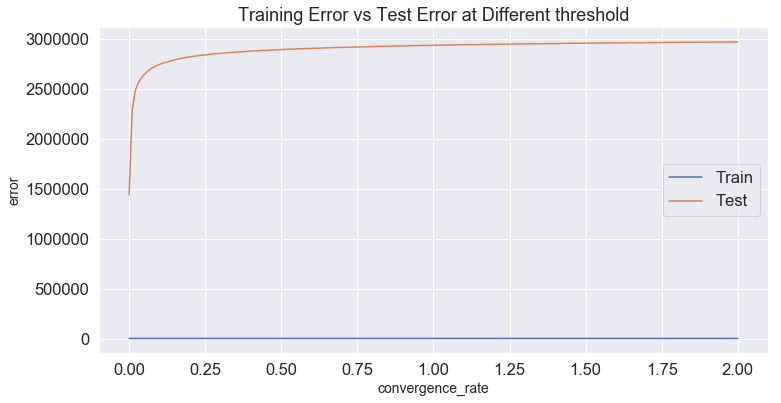

In [430]:
#Running linear regression for various threshold values

#Gradient Descent Function
def grad_func_2(beta,lr,x,y,max_iter,diff_cost):
    y = y[:,np.newaxis]
    y_rows, y_cols = y.shape
    
    x_rows, x_col = x.shape
    x_not = np.ones((x_rows,1))
    X = np.hstack((x_not,x))
    X_rows, X_col = X.shape
    
    curr_diff_cost = diff_cost + 1
    new_beta = np.random.rand(X_col,1)
    cost_matrix = np.zeros(max_iter)
    beta_matrix = np.zeros((max_iter,X_col))
    itr = 0
    
    while itr <max_iter and curr_diff_cost > diff_cost:
        y_cap = np.array(np.dot(X,new_beta),dtype = np.float64)
        err = y_cap - y
        grad = lr*(X.T.dot(err))*(1/X_rows)
        new_beta -= grad
        cost = cost_func(X,y,new_beta)
        beta_matrix[itr,:] = new_beta.T
        cost_matrix[itr] = cost
        
        if itr == 0:
            pass
        else:
            curr_diff_cost = cost_matrix[itr-1] - cost_matrix[itr]
            
        itr +=1
        
    beta_final = beta_matrix[np.argmin(cost_matrix[cost_matrix>0])]
    
    return beta_matrix, cost_matrix[cost_matrix>0], beta_final, itr

max_iter = 1000
lr = 0.1
diff_costs = np.linspace(2, 10e-7, num = 200)
#(1000,100,10,1,0.1,0.01,0.00001, 0.000001, 0.0000001)
np.random.seed(12500)
train_err_2 = []
test_err_2 = []

for diff_cost in diff_costs:
    beta = np.random.rand(x_train_task_scaled.shape[1],1)
    beta_df = pd.DataFrame(beta,columns = ['Beta_values'])
    betas,costs, beta_final,itr = grad_func_2(beta_df, lr,x_train_task_scaled,y_train,max_iter,diff_cost)
    train_err_2.append(costs[np.argmin(costs)])
    test_err_2.append(pred_linear(x_test_task_scaled,y_test,betas))
    itr

plt.figure(figsize = (12,6))
plt.title("Training Error vs Test Error at Different threshold" )
plt.plot(diff_costs,train_err_2, label='Train')   
plt.plot(diff_costs,test_err_2, label='Test')
plt.ylabel('error', fontsize=14)
plt.xlabel('convergence_rate', fontsize=14)
plt.legend()
plt.show()

#print("Best threshold value" diff_costs[np.argmin(test_err_2)] )


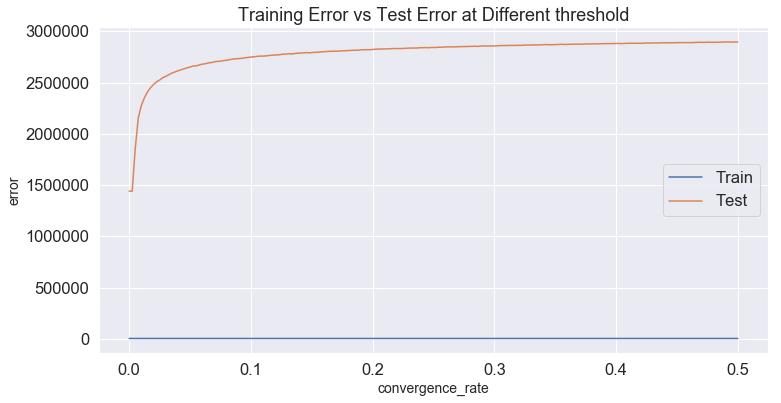

In [431]:
#For getting the best value of threshold
max_iter = 1000
lr = 0.1
diff_costs = np.linspace(0.5, 10e-7, num = 200)
#(1000,100,10,1,0.1,0.01,0.00001, 0.000001, 0.0000001)
np.random.seed(12500)
train_err_2 = []
test_err_2 = []

for diff_cost in diff_costs:
    beta = np.random.rand(x_train_task_scaled.shape[1],1)
    beta_df = pd.DataFrame(beta,columns = ['Beta_values'])
    betas,costs, beta_final,itr = grad_func_2(beta_df, lr,x_train_task_scaled,y_train,max_iter,diff_cost)
    train_err_2.append(costs[np.argmin(costs)])
    test_err_2.append(pred_linear(x_test_task_scaled,y_test,betas))
    itr

plt.figure(figsize = (12,6))
plt.title("Training Error vs Test Error at Different threshold" )
plt.plot(diff_costs,train_err_2, label='Train')   
plt.plot(diff_costs,test_err_2, label='Test')
plt.ylabel('error', fontsize=14)
plt.xlabel('convergence_rate', fontsize=14)
plt.legend()
plt.show()

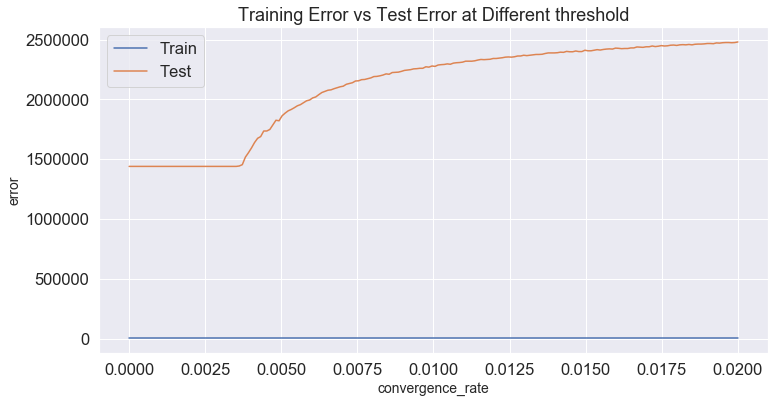

In [433]:
#For getting the best value of threshold
max_iter = 1000
lr = 0.1
diff_costs = np.linspace(0.02, 10e-7, num = 200)
#(1000,100,10,1,0.1,0.01,0.00001, 0.000001, 0.0000001)
np.random.seed(12500)
train_err_2 = []
test_err_2 = []

for diff_cost in diff_costs:
    beta = np.random.rand(x_train_task_scaled.shape[1],1)
    beta_df = pd.DataFrame(beta,columns = ['Beta_values'])
    betas,costs, beta_final,itr = grad_func_2(beta_df, lr,x_train_task_scaled,y_train,max_iter,diff_cost)
    train_err_2.append(costs[np.argmin(costs)])
    test_err_2.append(pred_linear(x_test_task_scaled,y_test,betas))
    itr

plt.figure(figsize = (12,6))
plt.title("Training Error vs Test Error at Different threshold" )
plt.plot(diff_costs,train_err_2, label='Train')   
plt.plot(diff_costs,test_err_2, label='Test')
plt.ylabel('error', fontsize=14)
plt.xlabel('convergence_rate', fontsize=14)
plt.legend()
plt.show()

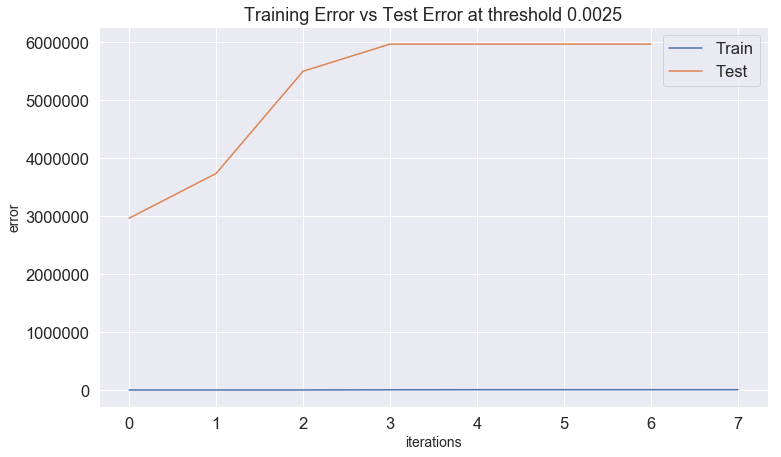

In [447]:
#Running linear regression for threshold value 0.0025
diff_cost = 0.0025
max_iter = 2000
lr = 0.00001
np.random.seed(12500)

beta = np.random.rand(x_train_task_scaled.shape[1],1)
beta_df = pd.DataFrame(beta,columns = ['Beta_values'])
betas,costs, beta_final,itr = grad_func_2(beta_df, lr,x_train_task_scaled,y_train,max_iter,diff_cost)
train_err_2.append(costs[np.argmin(costs)])
test_err_2.append(pred_linear(x_test_task_scaled,y_test,betas))
plt.figure(figsize = (12,7))
plt.title("Training Error vs Test Error at threshold 0.0025" )
plt.plot(train_err_2, label='Train')   
plt.plot(test_err_2, label='Test')
plt.ylabel('error', fontsize=14)
plt.xlabel('iterations', fontsize=14)
plt.legend()
plt.show()

#print("Best threshold value" diff_costs[np.argmin(test_err_2)] )


# Experiment 3: Pick ten features randomly and retrain your models only on these ten features. Compare train and test error results for the case of using your original set of features (greater than 15) and ten random features. Report the ten randomly selected features


In [148]:
from sklearn.preprocessing import StandardScaler
modify_x = StandardScaler()
x_train_scaled = modify_x.fit_transform(x_train)
x_test_scaled = modify_x.transform(x_test)

In [421]:
#Random dataset
#Dividing train and test dataset into x(independent variables) and y(dependent variable)
x_train_rand10 = x_train.sample(n=10,random_state=None,axis=1)
random_columns = list(x_train_rand10.columns)
x_test_rand10=x_test[random_columns]

#Scaling on randomly selected coulms from the original dataset
from sklearn.preprocessing import StandardScaler
modify_x = StandardScaler()
x_train_rand10_scaled = modify_x.fit_transform(x_train_rand10)
x_test_rand10_scaled = modify_x.transform(x_test_rand10)


print("random features",random_columns)

random features ['lights', 'Night', 'T3', 'T2', 'rv1', 'T8', 'T7', 'T1', 'RH_1', 'RH_2']


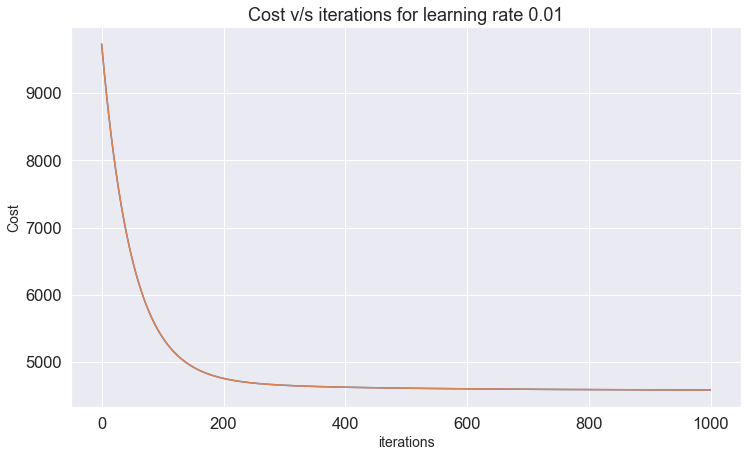

Best beta paramenters for learning rate 0.01, improvement rate 0.001 and random seed 12500 [ 97.27982452 -14.51958515  -0.65057474  18.83120991 -20.59211703
  -0.89300978  -5.68646216   9.72156306   6.634521     8.41198752
  30.53887633]
training error [4584.813741496474]
testing error [1561485.4414956844]


In [377]:
#Running Linear Regression with gradient descent on the random dataset    
max_iter = 1000
lr = 0.01
diff_cost = 0.001
np.random.seed(12500)
train_err = []
test_err = []
beta = np.random.rand(x_train_rand10_scaled.shape[1],1)
beta_df = pd.DataFrame(beta,columns = ['Beta_values'])
betas,costs, beta_final = grad_func(beta_df, lr,x_train_rand10_scaled,y_train,max_iter,diff_cost)
train_err.append(costs[np.argmin(costs)])
test_err.append(pred_linear(x_test_rand10_scaled,y_test,betas))
plt.figure(figsize =(12,7))
plt.plot(costs)
plt.title('Cost v/s iterations for learning rate 0.01', fontsize = 18)
plt.ylabel('Cost', fontsize = 14)
plt.xlabel('iterations', fontsize = 14)
plt.plot(costs)
plt.show()
print("Best beta paramenters for learning rate 0.01, improvement rate 0.001 and random seed 12500", beta_final)
print("training error", train_err)
print("testing error", test_err)

# Now pick ten features that you think are best suited to predict the output, and retrain your models using these ten features. Compare to the case of using your original set of features and to the random features case. Did your choice of features provide better results than picking random features? Why? Did your choice of features provide better results than using all features? Why?

In [352]:
corr = train.corr(method='pearson')
num_of_cols = 20
top_n =#FunctiontogettheMulticollinearity:

 
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = x_train.columns
    for i in range(0, x_train.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

#Functiontogettopcorrelations 

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr=au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(x_train, 40))
 np.abs(corr['Appliances']).sort_values(ascending=False)[1:num_of_cols].index
top_n

Index(['Day', 'Night', 'lights', 'RH_out', 'T2', 'T6', 'T_out', 'RH_8', 'T3',
       'Windspeed', 'RH_1', 'RH_6', 'RH_2', 'T1', 'RH_7', 'RH_9', 'T4', 'T8',
       'RH_3'],
      dtype='object')

In [366]:
#Best dataset
#Dividing train and test dataset into x(independent variables) and y(dependent variable)
#top_n10 = list('Day','lights','RH_out','T2','T_out','RH_8','T3','Windspeed','RH_1','RH_6')
x_train_best10 = x_train.loc[:,['Day','lights','RH_out','T2','T_out','RH_8','T8','T3','T9','RH_3']]
x_test_best10 = x_test.loc[:,['Day','lights','RH_out','T2','T_out','RH_8','T8','T3','T9','RH_3']]

#Scaling on randomly selected coulms from the original dataset
from sklearn.preprocessing import StandardScaler
modify_x = StandardScaler()
x_train_best10_scaled = modify_x.fit_transform(x_train_best10)
x_test_best10_scaled = modify_x.transform(x_test_best10)

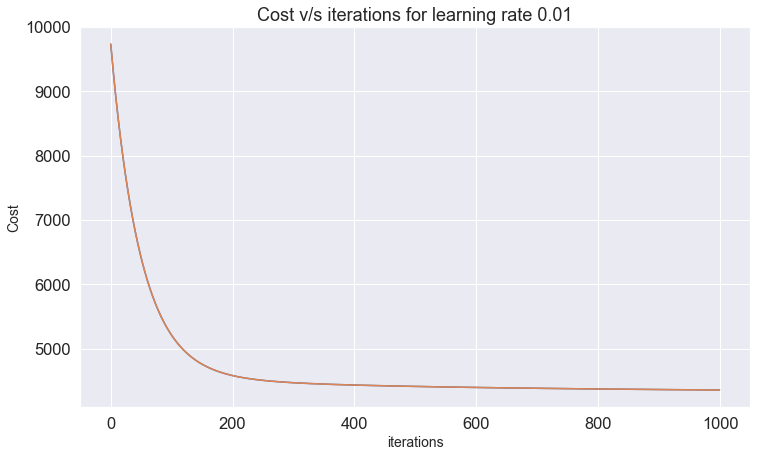

Best beta paramenters for learning rate 0.01, improvement rate 0.001 and random seed 12500 [ 97.27982452  22.9847466   18.06472553  -5.4520085    1.3491044
  -5.03373375 -19.0430787    7.6533577   25.20785182 -25.90123413
  19.83841815]
training error [4356.956119960335]
testing error [1499732.9076366138]


In [396]:
#Running Linear Regression with gradient descent on the best features selected dataset    
max_iter = 1000
lr = 0.01
diff_cost = 0.001
np.random.seed(12500)
train_err = []
test_err = []
beta = np.random.rand(x_train_best10_scaled.shape[1],1)
beta_df = pd.DataFrame(beta,columns = ['Beta_values'])
betas,costs, beta_final = grad_func(beta_df, lr,x_train_best10_scaled,y_train,max_iter,diff_cost)
train_err.append(np.min(costs))
test_err.append(pred_linear(x_test_best10_scaled,y_test,betas))
plt.figure(figsize =(12,7))
plt.plot(costs)
plt.title('Cost v/s iterations for learning rate 0.01', fontsize = 18)
plt.ylabel('Cost', fontsize = 14)
plt.xlabel('iterations', fontsize = 14)
plt.plot(costs)
plt.show()
print("Best beta paramenters for learning rate 0.01, improvement rate 0.001 and random seed 12500", beta_final)
print("training error", train_err)
print("testing error", test_err)